<a href="https://colab.research.google.com/github/Niranjan1422/Infosys_Internship/blob/main/Infosys_Chat%26Support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/bin/Infosys_Datasets/customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
drop_cols = [
"Ticket ID",
"Customer Name",
"Customer Email",
"Resolution"  # only exists after ticket is closed (data leakage)
]
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Age                  8469 non-null   int64  
 1   Customer Gender               8469 non-null   object 
 2   Product Purchased             8469 non-null   object 
 3   Date of Purchase              8469 non-null   object 
 4   Ticket Type                   8469 non-null   object 
 5   Ticket Subject                8469 non-null   object 
 6   Ticket Description            8469 non-null   object 
 7   Ticket Status                 8469 non-null   object 
 8   Ticket Priority               8469 non-null   object 
 9   Ticket Channel                8469 non-null   object 
 10  First Response Time           5650 non-null   object 
 11  Time to Resolution            2769 non-null   object 
 12  Customer Satisfaction Rating  2769 non-null   float64
dtypes: 

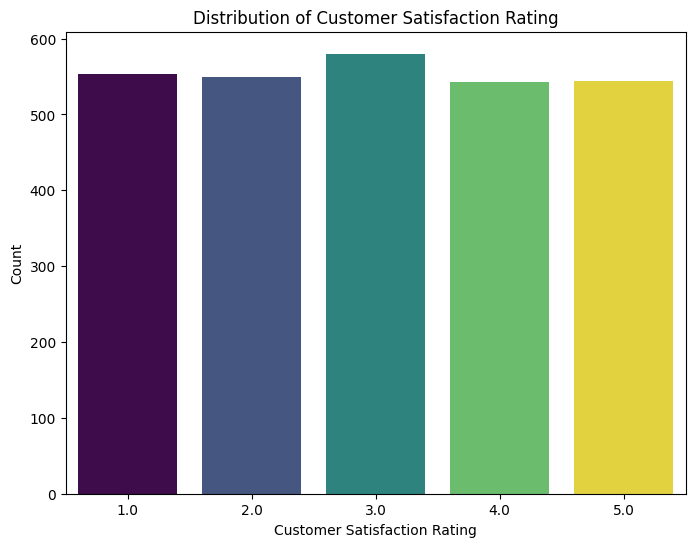

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Satisfaction Rating', data=df, palette='viridis', hue='Customer Satisfaction Rating', legend=False)
plt.title('Distribution of Customer Satisfaction Rating')
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df["Ticket Status"].value_counts()


,count
Ticket Status,
Pending Customer Response,2881
Open,2819
Closed,2769


In [ ]:
df["Ticket Type"].value_counts()


,count
Ticket Type,
Refund request,1752
Technical issue,1747
Cancellation request,1695
Product inquiry,1641
Billing inquiry,1634


In [ ]:
df["Ticket Priority"].value_counts()

,count
Ticket Priority,
Medium,2192
Critical,2129
High,2085
Low,2063


In [ ]:
df["Ticket Channel"].value_counts()

,count
Ticket Channel,
Email,2143
Phone,2132
Social media,2121
Chat,2073


In [ ]:
df["Ticket Subject"] = df["Ticket Subject"].fillna("")
df["Ticket Description"] = df["Ticket Description"].fillna("")
df["Customer Satisfaction Rating"] = df["Customer Satisfaction Rating"].fillna(df["Customer Satisfaction Rating"].median())

In [ ]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"], errors="coerce")
df["purchase_year"] = df["Date of Purchase"].dt.year
df["purchase_month"] = df["Date of Purchase"].dt.month
df["purchase_day"] = df["Date of Purchase"].dt.day
df = df.drop(columns=["Date of Purchase"])

In [ ]:
df["First Response Time"]

,First Response Time
0,2023-06-01 12:15:36
1,2023-06-01 16:45:38
2,2023-06-01 11:14:38
3,2023-06-01 07:29:40
4,2023-06-01 00:12:42
...,...
8464,NaN
8465,NaN
8466,2023-06-01 09:44:22
8467,2023-06-01 18:28:24


In [ ]:
df["First Response Time"] = df["First Response Time"].fillna("Unknown")
df["First Response Time"]

,First Response Time
0,2023-06-01 12:15:36
1,2023-06-01 16:45:38
2,2023-06-01 11:14:38
3,2023-06-01 07:29:40
4,2023-06-01 00:12:42
...,...
8464,Unknown
8465,Unknown
8466,2023-06-01 09:44:22
8467,2023-06-01 18:28:24


In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
df["ticket_text"] = (
    df["Ticket Subject"].apply(clean_text)
    + " "
    + df["Ticket Description"].apply(clean_text)
)
df = df.drop(columns=["Ticket Subject", "Ticket Description"])

In [ ]:
df.isnull().sum()

,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Ticket Type,0
Ticket Status,0
Ticket Priority,0
Ticket Channel,0
First Response Time,0
Time to Resolution,5700
Customer Satisfaction Rating,0


In [ ]:
df["Time to Resolution"] = df["Time to Resolution"].fillna("Unknown")

In [ ]:
df = pd.get_dummies(
df,
columns=["Ticket Status", "Customer Gender"],
drop_first=True
)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = [
"Product Purchased",
"Ticket Type",
"Ticket Priority",
"Ticket Channel",
"First Response Time",
"Time to Resolution"
]
encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [ ]:
df[label_cols].head()
df[label_cols].dtypes

,0
Product Purchased,int64
Ticket Type,int64
Ticket Priority,int64
Ticket Channel,int64
First Response Time,int64
Time to Resolution,int64


In [ ]:
df.head()

,Customer Age,Product Purchased,Ticket Type,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,purchase_year,purchase_month,purchase_day,ticket_text,Ticket Status_Open,Ticket Status_Pending Customer Response,Customer Gender_Male,Customer Gender_Other
0,32,16,4,0,3,2923,2728,3.0,2021,3,22,product setup im having an issue with the prod...,False,True,False,True
1,42,21,4,0,0,3915,2728,3.0,2021,5,22,peripheral compatibility im having an issue wi...,False,True,False,False
2,48,10,4,2,3,2684,2153,3.0,2020,7,14,network problem im facing a problem with my pr...,False,False,False,True
3,27,25,0,2,3,1859,293,3.0,2020,11,13,account access im having an issue with the pro...,False,False,False,False
4,67,5,0,2,1,208,2356,1.0,2020,2,4,data loss im having an issue with the productp...,False,False,False,False
